In [12]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, peak_prominences
from scipy.ndimage import gaussian_filter1d
#from scipy.stats import landau
from scipy.signal import fftconvolve
from landaupy import landau, langauss


FADC_BIN_WIDTH = 5

In [13]:
PE_top_tank1 = [30.09632281, 44.87462245,  57.0133055,   69.73545979,  85.98207755,  97.88429205, 113.55122369, 126.26875822, 138.45305493]
d_PE_top_tank1 = [15.6800124, 25.86971418, 32.51478724, 18.57026526, 17.70286438,  5.16900034, 13.82664179, 16.37794306, 17.14593712]

PE_bottom_tank1 = [266.61335852, 253.75665647, 240.42419422, 229.79663728, 212.81594643, 195.68028873, 180.61285603, 163.39282154, 145.58704188] 
d_PE_bottom_tank1 = [20.5411189 ,15.74267458 , 9.40528812 ,40.12513339,20.78586326, 33.13962641, 20.50984882, 27.76298111, 17.97602242] 

PE_top_tank2 = [42.1686052,   59.99400416,  76.86692121,  95.41553221, 114.49953135, 130.21737367, 148.67492647, 170.43183563, 186.12350185]
d_PE_top_tank2 = [15.44770507, 25.60508779, 36.24918773, 34.10921777, 30.99010358, 12.73015259,23.73862039, 51.11001445, 62.24265799]

PE_bottom_tank2 = [387.85529934, 375.94553515, 360.36397534, 350.61606895, 334.55728323, 312.08655018, 293.98678497, 272.16809692, 257.62261712]
d_PE_bottom_tank2 = [54.65337883,  96.04487771,  50.26563759,  84.10863903,  89.72898468, 100.16109862,  57.29180833,  69.45984137, 75.81703768]

In [14]:
np.asarray(PE_top_tank2[4]) / np.asarray(PE_top_tank1[2])

np.float64(2.008294911965769)

In [18]:
np.asarray(PE_top_tank2) / np.asarray(PE_top_tank1)

array([1.40112151, 1.33692499, 1.34822776, 1.36824985, 1.33166742,
       1.33031941, 1.30932034, 1.34975459, 1.34430766])

In [15]:
np.asarray(PE_bottom_tank2[4]) / np.asarray(PE_bottom_tank1[2])

np.float64(1.3915291858017567)

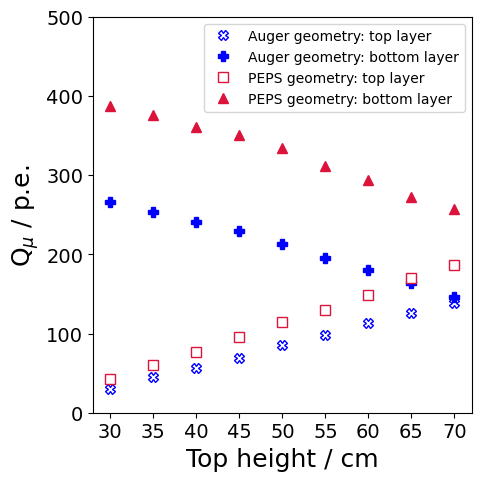

In [16]:
top_height = np.arange(30,75,5)

fig, ax = plt.subplots(figsize=(4.7, 4.7), constrained_layout=True)

plt.errorbar(top_height, PE_top_tank1, markersize = 7, fmt='X',markerfacecolor='white', markeredgecolor='blue', ecolor = 'blue', label='Auger geometry: top layer')
plt.errorbar(top_height, PE_bottom_tank1, markersize = 7, fmt='P',markerfacecolor='blue', markeredgecolor='blue', ecolor = 'darkorange', label='Auger geometry: bottom layer')
plt.errorbar(top_height, PE_top_tank2, markersize = 7, fmt='s',markerfacecolor='white', markeredgecolor='crimson', ecolor = 'crimson', label='PEPS geometry: top layer')
plt.errorbar(top_height, PE_bottom_tank2, markersize = 7, fmt='^',markerfacecolor='crimson', markeredgecolor='crimson', ecolor = 'crimson', label='PEPS geometry: bottom layer')

#plt.plot(top_height, PE_top_tank1,  c='crimson',linestyle='dashed', label='Top layer, Auger geometry')
#plt.plot(top_height, PE_bottom_tank1, c = 'darkorange', linestyle='dashed', label='Bottom layer, Auger geometry')
#plt.plot(top_height, PE_top_tank2,  c='blue', label='Top layer, PEPS geometry')
#plt.plot(top_height, PE_bottom_tank2, c='purple', label='Bottom layer, Auger geometry')


plt.xlabel('Top height / cm', size = 18)
plt.ylabel(r'Q$_{\mu}$ / p.e.', size= 18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.legend()
#ax.set_box_aspect(1)

ax.set_ylim(0,500)

plt.savefig('/Users/workspace/Software/Pierre_Tank/New_Geometry/plots/PE_vs_height_v1.pdf')

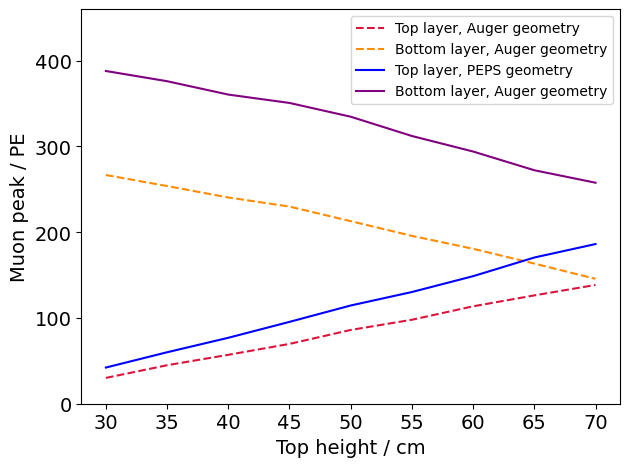

In [17]:
top_height = np.arange(30,75,5)


#plt.errorbar(top_height, PE_top_tank1, yerr = d_PE_top_tank1, fmt='o',markerfacecolor='crimson', markeredgecolor='crimson', ecolor = 'crimson', label='Top layer, Auger geometry')
#plt.errorbar(top_height, PE_bottom_tank1, yerr = d_PE_bottom_tank1, fmt='o',markerfacecolor='darkorange', markeredgecolor='darkorange', ecolor = 'darkorange', label='Bottom layer, Auger geometry')
#plt.errorbar(top_height, PE_top_tank2, yerr = d_PE_top_tank2, fmt='o',markerfacecolor='blue', markeredgecolor='blue', ecolor = 'blue', label='Top layer, PEPS geometry')
#plt.errorbar(top_height, PE_bottom_tank2, yerr = 0, fmt='o',markerfacecolor='purple', markeredgecolor='purple', ecolor = 'purple', label='Bottom layer, Auger geometry')

plt.plot(top_height, PE_top_tank1,  c='crimson',linestyle='dashed', label='Top layer, Auger geometry')
plt.plot(top_height, PE_bottom_tank1, c = 'darkorange', linestyle='dashed', label='Bottom layer, Auger geometry')
plt.plot(top_height, PE_top_tank2,  c='blue', label='Top layer, PEPS geometry')
plt.plot(top_height, PE_bottom_tank2, c='purple', label='Bottom layer, Auger geometry')


plt.xlabel('Top height / cm', size = 14)
plt.ylabel('Muon peak / PE', size=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
plt.tight_layout()
plt.legend()

plt.ylim(0,460)

plt.savefig('/Users/workspace/Software/Pierre_Tank/New_Geometry/plots/PE_vs_height_v2.pdf')